In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
house_data = pd.read_csv('Housing.csv')

In [3]:
house_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# loading the dataset into dataFram
house_data_datafram = pd.DataFrame(house_data)

In [5]:
house_data_datafram.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
house_data_datafram.shape

(545, 13)

In [7]:
house_data_datafram.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
house_data_datafram.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
house_data_datafram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
print(house_data_datafram.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_columns = house_data_datafram.select_dtypes(include=["object"]).columns

for col in categorical_columns:
    house_data_datafram[col] = le.fit_transform(house_data_datafram[col])

house_data_datafram.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [12]:
# now we understanding the correlation between the various features in dataset
# posiive and negative correlation

In [13]:
correlation = house_data_datafram.corr()

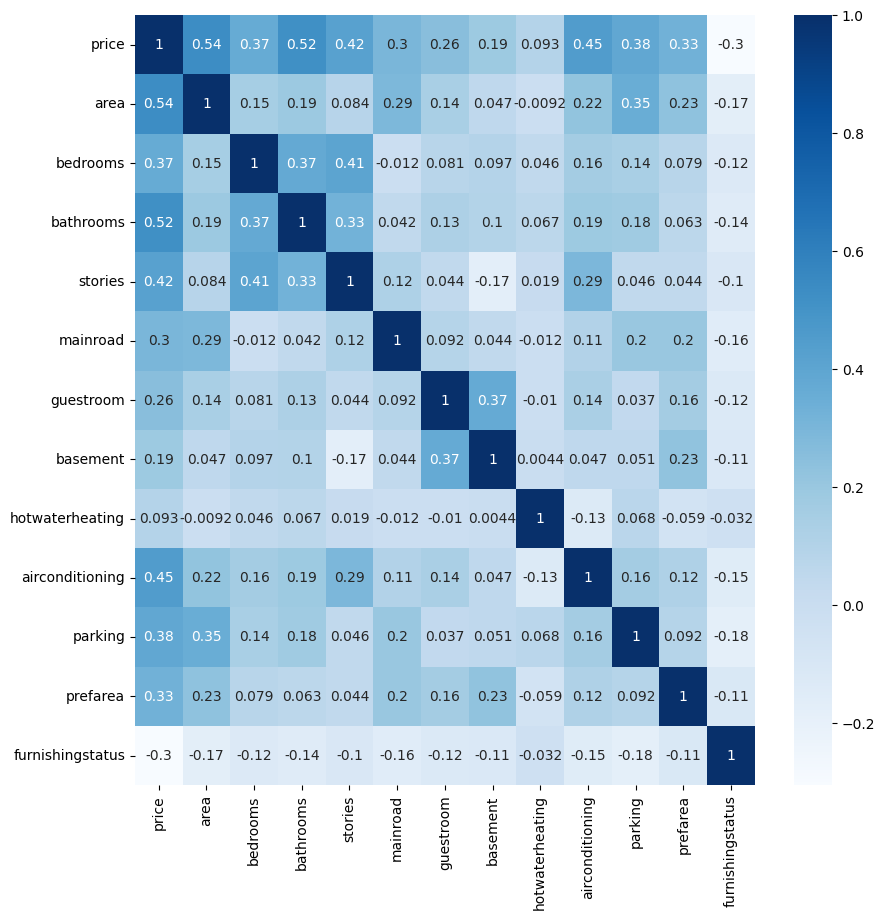

In [14]:
# now we constructing the heatmap to understand the correlation
plt.figure(figsize=(10,10))
# sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annote_kws={"size":8}, cmap="Blues")
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.show()

In [15]:
x = house_data_datafram.iloc[:, 1:]
y = house_data_datafram["price"]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [21]:
# # Support Vector Regressor (SVR)
# from sklearn.svm import SVR
# model = SVR(kernel="poly")
# model.fit(x_train, y_train)

# training_data_pred = model.predict(x_train)
# score_1 = metrics.r2_score(y_train, training_data_pred)
# score_2 = metrics.mean_absolute_error(y_train, training_data_pred)

# print("R squared Error : ", score_1)
# print("Mean Absolute Error : ", score_2)

# # print(model.score(x_train, y_train)*100)
# print(model.score(x_train, y_train)*100)
# print(model.score(x_test, y_test)*100)

R squared Error :  -0.055842665414999715
Mean Absolute Error :  1309468.6154934545
-5.5842665414999715
-10.154277570078207


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(x_train, y_train)

# Predictions
training_data_pred = linear_model.predict(x_train)
test_data_pred = linear_model.predict(x_test)

# Evaluate metrics
print("Linear Regression:")
print("Training R²:", metrics.r2_score(y_train, training_data_pred))
print("Training MAE:", metrics.mean_absolute_error(y_train, training_data_pred))
print("Testing R²:", metrics.r2_score(y_test, test_data_pred))
print("Testing MAE:", metrics.mean_absolute_error(y_test, test_data_pred))


Linear Regression:
Training R²: 0.6854429472843788
Training MAE: 718146.5977537858
Testing R²: 0.6494754192267804
Testing MAE: 979679.6912959905
